In [1]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
C:\Users\tejas\anaconda3\envs\ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tejas\anaconda3\envs\ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tejas\anaconda3\envs\ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tejas\anaconda3\envs\ANN\lib\site-packages\t

In [2]:
def stocks_data(symbols, dates):
    #df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df = pd.read_csv("Data/Stocks/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True,  na_values=['nan'])
        #df_temp = df_temp.rename(columns={'Close': symbol})        
    return df

dates = pd.date_range('1984-09-02','2016-12-31',freq='B')
symbols = ['aapl']
df = stocks_data(symbols, dates)
print(df)
df.dropna(subset = ['Close'], inplace=True)
#df.interpolate().plot()
#plt.show()

                 Open       High        Low      Close    Volume  OpenInt
Date                                                                     
1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030        0
1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532        0
1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199        0
1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801        0
1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062        0
...               ...        ...        ...        ...       ...      ...
2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241        0
2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877        0
2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166        0
2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086        0
2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494        0

[8364 rows x 6 columns]


In [3]:
#getting number of rows and columns
df.shape

(8364, 6)

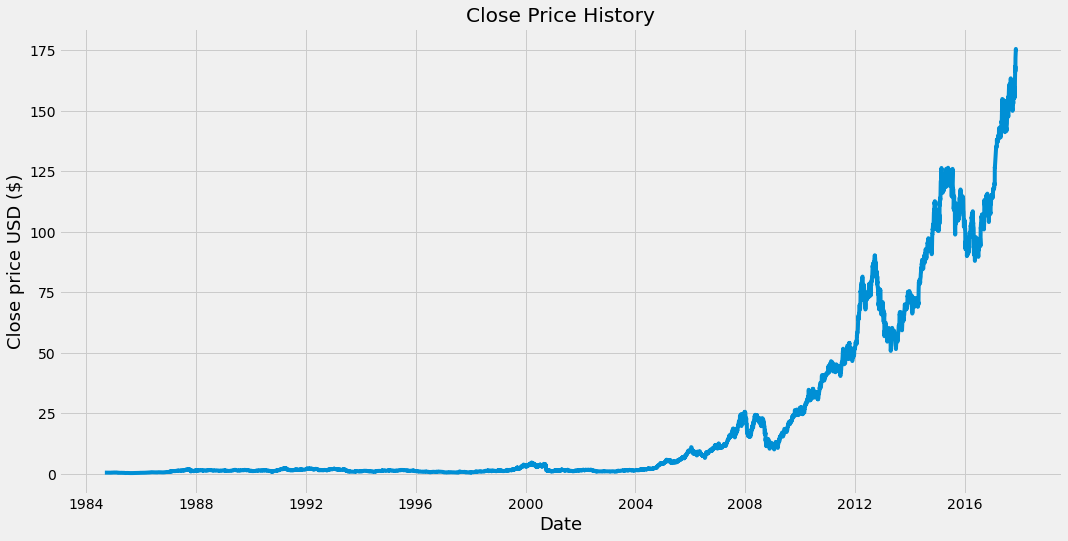

In [4]:
#visualizeing closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [5]:
#creating new dataframw for 'Close'column
data=df.filter(['Close'])
#converting dataset to numpy array
dataset=data.values
#taining rows model number
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

6692

In [6]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00110258],
       [0.0010881 ],
       [0.00113189],
       ...,
       [1.        ],
       [0.99794731],
       [0.99464019]])

In [7]:
#creating scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#spliting data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00110258, 0.0010881 , 0.00113189, 0.00105868, 0.00119033,
       0.00122677, 0.00129245, 0.00119746, 0.00114643, 0.00115378,
       0.00113189, 0.00110988, 0.00105868, 0.00102977, 0.00102977,
       0.00097104, 0.00092   , 0.00093466, 0.00097104, 0.00100023,
       0.00094926, 0.00094926, 0.00092742, 0.00086173, 0.00084702,
       0.00075208, 0.00086886, 0.00086173, 0.00094926, 0.00101506,
       0.00101506, 0.00100023, 0.00105143, 0.00107327, 0.00098575,
       0.00092742, 0.00093466, 0.00096391, 0.00094926, 0.00096391,
       0.00094926, 0.00093466, 0.00107327, 0.00102977, 0.00093466,
       0.00080323, 0.00087627, 0.00082512, 0.00084702, 0.00084702,
       0.00080323, 0.00067916, 0.00074473, 0.00078869, 0.00084702,
       0.00086886, 0.00092742, 0.00104431, 0.00100023, 0.00093466])]
[0.0009055220767263037]

[array([0.00110258, 0.0010881 , 0.00113189, 0.00105868, 0.00119033,
       0.00122677, 0.00129245, 0.00119746, 0.00114643, 0.00115378,
       0.00113189, 0.00110988, 0.

In [8]:
#convert x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
x_train.shape

(6632, 60)

In [10]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(6632, 60, 1)

In [11]:
#building the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
6632/6632 [==============================] - 474s 72ms/step - loss: 7.6487e-05


In [14]:
#NOw creating testing dataset
#creating array scaled values from 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#creating dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#convert data to numpy array
x_test = np.array(x_test)

In [16]:
#reshapeing data to 3D model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [17]:
#get the predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [18]:
#to evaluatng
#gettong root mean square error(RMSE) to check better fit to know accracy
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.466355342980311

C:\Users\tejas\anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


              Close  Predictions
Date                            
2011-03-24   44.179    40.147591
2011-03-25   45.019    40.321842
2011-03-28   44.877    40.652042
2011-03-29   44.945    40.927547
2011-03-30   44.646    41.136333
...             ...          ...
2017-11-06  173.630   144.568222
2017-11-07  174.180   146.020844
2017-11-08  175.610   147.249924
2017-11-09  175.250   148.379608
2017-11-10  174.670   149.140396

[1672 rows x 2 columns]


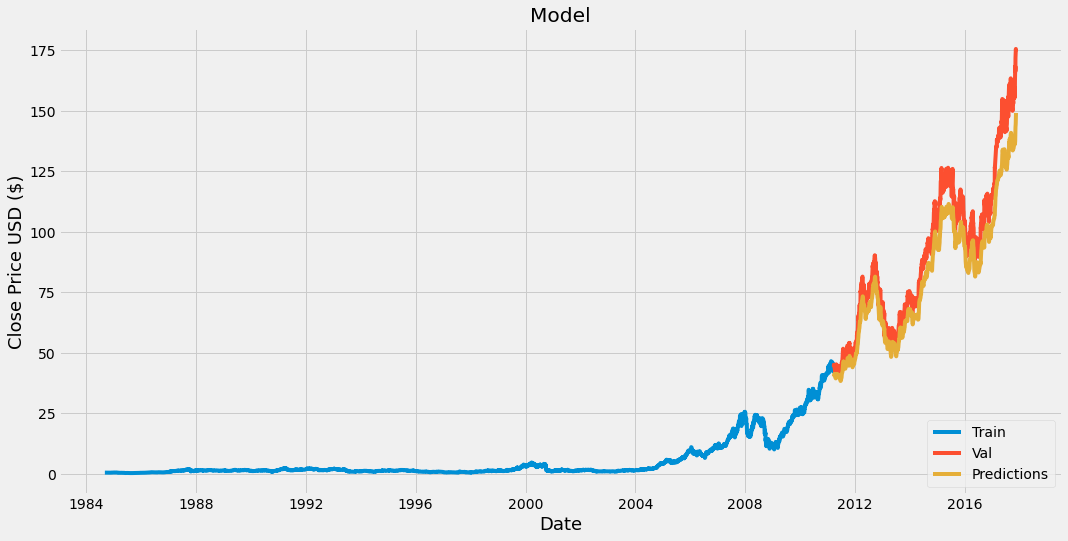

In [19]:
#Plot the data
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions
print(valid)
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
print(y_test)
print(predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

[[ 44.179]
 [ 45.019]
 [ 44.877]
 ...
 [175.61 ]
 [175.25 ]
 [174.67 ]]
[[ 40.14759 ]
 [ 40.321842]
 [ 40.652042]
 ...
 [147.24992 ]
 [148.37961 ]
 [149.1404  ]]


ValueError: continuous is not supported